In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("E:\Belajar Python\Data set\diabetes.csv",header=None, skiprows=1,names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label 

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=13000000)

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)



In [5]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
cnf_matriks = confusion_matrix(y_test, y_pred)
print(cnf_matriks)

[[118  12]
 [ 26  36]]


Text(0.5, 257.44, 'Predicted label')

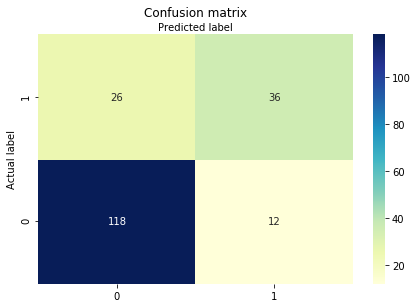

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matriks),annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,2])
plt.tight_layout()
plt.title('Confusion matrix', y=2.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


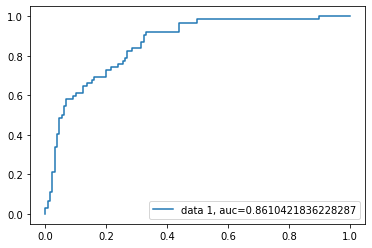

In [8]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
newx = {'pregnant':[5,1,3], 'insulin':[120,90,145], 'bmi':[44.5,42.1,48], 'age':[35,40,40],'glucose':[100,100,120],'bp':[60,65,77],'pedigree':[0.6,0.8,1.8]}
df_new = pd.DataFrame(newx,columns= ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree'])

feature_cols2 = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X_new = df_new[feature_cols2]
y_pred2=logreg.predict(X_new)

print(y_pred2)

[0 0 1]
